In [1]:
import pandas as pd
import altair as alt
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 
from functools import reduce

#**Part 1 - Loading the Data**

In [2]:
children_per_woman = pd.read_csv('https://raw.githubusercontent.com/ef2020/TextFiles/master/children_per_woman_total_fertility.csv')
children_per_woman.head(5)

,country,1799,1800,1801,1802,1803,1804,1805,1806,1807,...,2090,2091,2092,2093,2094,2095,2096,2097,2098,2099
0,Aruba,5.64,5.64,5.64,5.64,5.64,5.64,5.64,5.64,5.64,...,1.82,1.82,1.82,1.82,1.82,1.82,1.82,1.82,1.83,1.83
1,Afghanistan,7.00,7.00,7.00,7.00,7.00,7.00,7.00,7.00,7.00,...,1.74,1.74,1.74,1.74,1.74,1.74,1.74,1.74,1.74,1.74
2,Angola,6.93,6.93,6.93,6.93,6.93,6.93,6.93,6.94,6.94,...,2.54,2.52,2.50,2.48,2.47,2.45,2.43,2.42,2.40,2.40
3,Albania,4.60,4.60,4.60,4.60,4.60,4.60,4.60,4.60,4.60,...,1.78,1.78,1.78,1.79,1.79,1.79,1.79,1.79,1.79,1.79
4,Netherlands Antilles,5.80,5.80,5.80,5.80,5.80,5.80,5.80,5.80,5.80,...,2.00,2.00,2.01,2.01,2.01,2.01,2.01,2.02,2.02,2.02


In [3]:
child_mortality = pd.read_csv('https://raw.githubusercontent.com/ef2020/TextFiles/master/child_mortality_0_5_year_olds_dying_per_1000_born.csv')
child_mortality.head(5)

,country,1799,1800,1801,1802,1803,1804,1805,1806,1807,...,2090,2091,2092,2093,2094,2095,2096,2097,2098,2099
0,Afghanistan,469.0,469.0,469.0,469.0,469.0,469.0,470.0,470.0,470.0,...,12.60,12.40,12.20,12.00,11.80,11.60,11.50,11.30,11.10,11.10
1,Angola,486.0,486.0,486.0,486.0,486.0,486.0,486.0,486.0,486.0,...,17.70,17.50,17.30,17.10,17.00,16.80,16.60,16.40,16.30,16.30
2,Albania,375.0,375.0,375.0,375.0,375.0,375.0,375.0,375.0,375.0,...,2.32,2.30,2.27,2.24,2.22,2.19,2.16,2.14,2.11,2.11
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.86,0.84,0.83,0.81,0.80,0.79,0.78,0.77,0.76,0.76
4,United Arab Emirates,434.0,434.0,434.0,434.0,434.0,434.0,434.0,434.0,434.0,...,2.31,2.29,2.26,2.24,2.22,2.19,2.17,2.15,2.13,2.13


In [4]:
income = pd.read_csv('https://raw.githubusercontent.com/ef2020/TextFiles/master/income_per_person_gdppercapita_ppp_inflation_adj.csv')
income.head(5)

,country,1799,1800,1801,1802,1803,1804,1805,1806,1807,...,2040,2041,2042,2043,2044,2045,2046,2047,2048,2049
0,Afghanistan,674,674,674,674,674,674,674,674,674,...,2880,2940,3000,3070,3130,3200,3270,3340,3410,3480
1,Angola,691,693,697,700,702,705,709,712,716,...,8040,8220,8390,8570,8750,8940,9120,9320,9520,9720
2,Albania,746,746,746,746,746,747,747,747,747,...,24.5k,25k,25.5k,26.1k,26.6k,27.2k,27.8k,28.3k,28.9k,29.6k
3,Andorra,1340,1340,1340,1350,1350,1350,1350,1360,1360,...,108k,111k,113k,116k,118k,121k,123k,126k,128k,131k
4,United Arab Emirates,1120,1120,1120,1130,1130,1140,1140,1150,1150,...,74.5k,76.1k,77.7k,79.3k,81k,82.7k,84.5k,86.3k,88.1k,90k


In [5]:
geo = pd.read_csv('https://raw.githubusercontent.com/ef2020/TextFiles/master/gap_minder_geography.csv')
geo.head(5)

,geo,name,four_regions,eight_regions,six_regions,members_oecd_g77,Latitude,Longitude,UN member since,World bank region,"World bank, 4 income groups 2017","World bank, 3 income groups 2017",UNHCR
0,aus,Australia,asia,east_asia_pacific,east_asia_pacific,oecd,-25.0,135.00000,1/11/1945,East Asia & Pacific,High income,High income,Asia and the Pacific
1,brn,Brunei,asia,east_asia_pacific,east_asia_pacific,g77,4.5,114.66667,21/9/1984,East Asia & Pacific,High income,High income,Asia and the Pacific
2,khm,Cambodia,asia,east_asia_pacific,east_asia_pacific,g77,13.0,105.00000,14/12/1955,East Asia & Pacific,Lower middle income,Middle income,Asia and the Pacific
3,chn,China,asia,east_asia_pacific,east_asia_pacific,g77,35.0,105.00000,24/10/1945,East Asia & Pacific,Upper middle income,Middle income,Asia and the Pacific
4,fji,Fiji,asia,east_asia_pacific,east_asia_pacific,g77,-18.0,178.00000,13/10/1970,East Asia & Pacific,Upper middle income,Middle income,Asia and the Pacific


#**Part 2 - Subsetting the Data**


Save a new dataframe for the "children_per_woman", "child_mortality", and "income" dataframes above. These three new dataframes should contain only data for the year 2020 and should be named:
1. ```children_per_woman_2020```
2. ```child_mortality_2020```
3. ```income_2020```

Rename the "2020" columns using the following new column names for each respective dataframe:
1. "children_per_woman"
2. "child_mortality"
3. "income"

In [6]:
#TODO
children_per_woman_2020 = children_per_woman[['country', '2020']].copy()
children_per_woman_2020 = children_per_woman_2020.rename({'2020': 'children_per_woman'}, axis='columns')
children_per_woman_2020.head()

,country,children_per_woman
0,Aruba,1.79
1,Afghanistan,3.90
2,Angola,5.34
3,Albania,1.70
4,Netherlands Antilles,1.82


In [7]:
#TODO
child_mortality_2020 = child_mortality[['country', '2020']].copy(deep=True)
child_mortality_2020 = child_mortality_2020.rename({'2020': 'child_mortality'}, axis='columns')
child_mortality_2020.head()

,country,child_mortality
0,Afghanistan,56.10
1,Angola,70.40
2,Albania,8.36
3,Andorra,2.82
4,United Arab Emirates,6.97


In [8]:
#TODO
income_2020 = income[['country', '2020']].copy(deep=True)
income_2020 = income_2020.rename({'2020': 'income'}, axis='columns')
income_2020.head()

,country,income
0,Afghanistan,1950
1,Angola,6060
2,Albania,13.9k
3,Andorra,63.7k
4,United Arab Emirates,61.3k


#**Part 3 - Cleaning the Data**

In the "income_2020" dataframe, reformat the income values. If an income value does not contain a '.', replace 'k' with '000'. If there is a '.', replace 'k' with '00'.

In [9]:
#TODO
has_dot = income_2020['income'].str.contains(r'\.', na=False)
income_2020['income'] = np.where(
    has_dot,
    income_2020['income'].str.replace('k', '00', case=False),
    income_2020['income'].str.replace('k', '000', case=False)
)


Remove the periods from the income values.

In [10]:
#TODO
income_2020['income']= income_2020['income'].astype(str).str.replace('.', '', regex=False)
income_2020

,country,income
0,Afghanistan,1950
1,Angola,6060
2,Albania,13900
3,Andorra,63700
4,United Arab Emirates,61300
...,...,...
190,Samoa,5720
191,Yemen,2370
192,South Africa,11600
193,Zambia,3170


Convert the income values to integers.

In [11]:
#TODO
income_2020 = income_2020.astype({"income": "int64"})

If you converted the column type correctly, the output of the code below should read: **dtype('int64')**

In [12]:
income_2020['income'].dtype

dtype('int64')

#**Part 4 - Merging the Data**

Merge the dataframes in the following order:

1. "children_per_woman_2020"
2. "child_mortality_2020"
3. "income_2020"
4. "geo"

Save the final merged table as ```result```.

In [13]:
#TODO
result = children_per_woman_2020.merge(child_mortality_2020, on='country')


In [14]:
result = result.merge(income_2020, on='country')

In [15]:

result = result.merge(geo, left_on='country', right_on='name')

In [16]:
result.drop(columns='name', inplace=True)

In [17]:
result.head(5)

,country,children_per_woman,child_mortality,income,geo,four_regions,eight_regions,six_regions,members_oecd_g77,Latitude,Longitude,UN member since,World bank region,"World bank, 4 income groups 2017","World bank, 3 income groups 2017",UNHCR
0,Afghanistan,3.90,56.10,1950,afg,asia,asia_west,south_asia,g77,33.00,66.0,19/11/1946,South Asia,Low income,Low income,Asia and the Pacific
1,Angola,5.34,70.40,6060,ago,africa,africa_sub_saharan,sub_saharan_africa,g77,-12.50,18.5,1/12/1976,Sub-Saharan Africa,Lower middle income,Middle income,Southern Africa
2,Albania,1.70,8.36,13900,alb,europe,europe_east,europe_central_asia,others,41.00,20.0,14/12/1955,Europe & Central Asia,Upper middle income,Middle income,Europe
3,United Arab Emirates,1.67,6.97,61300,are,asia,asia_west,middle_east_north_africa,g77,23.75,54.5,9/12/1971,Middle East & North Africa,High income,High income,Middle East and North Africa
4,Argentina,2.22,9.16,20600,arg,americas,america_south,america,g77,-34.00,-64.0,24/10/1945,Latin America & Caribbean,Upper middle income,Middle income,Americas


In [18]:
result.shape

(184, 16)

#**Part 5 - Visualizing the Data**

**A.**

Using Altair, create a bubble plot using data from the ```result``` dataframe.

Plot requirements:
- The x values represent children per woman.
- The y values represent income.
- The size of the points represents child mortality.
- The color of the points represents the four different regions found within the data.
- Set an appropriate title for the plot.
- The legend is bound to region so if you click on a particular value in the legend, the plot will adjust its display to show only the associated points.
- Ensure that when you hover over a single point on the plot, information on unhcr, country, income, children per woman, and child mortality is displayed.
- Use a log scale and adjust the y-axis label accordingly.



In [22]:
#TODO
selection = alt.selection_point(fields=['four_regions'], bind='legend')
bubble_result = alt.Chart(result).mark_point(filled=True).encode(
    alt.X('children_per_woman:Q', scale=alt.Scale(zero=False)),
    alt.Y('income:Q', scale=alt.Scale(type='log'), title='Income (Log Scale)'),
    alt.Size('child_mortality:Q'), # scale=alt.Scale(range=[0,1000])
    alt.Color('four_regions:N'), 
    #alt.OpacityValue(0.5),
    #alt.Shape('four_regions:N')
    tooltip=[
        alt.Tooltip('four_regions:N'), 
        alt.Tooltip('UNHCR:N'),
        alt.Tooltip('country:N'),
        alt.Tooltip('income:Q'),
        alt.Tooltip('children_per_woman:Q'),
        alt.Tooltip('child_mortality:Q')]
).properties(
    title='Global Health and Wealth Metrics by Region', 
    width=500, 
    height=500
).add_params(
    selection
).transform_filter(
    selection 
).interactive()
bubble_result

alt.Chart(...)

**B.**

Using Seaborn, create a pairplot of the three quantitative features illustrated in part A. Use the ```results_reduced``` dataframe below.

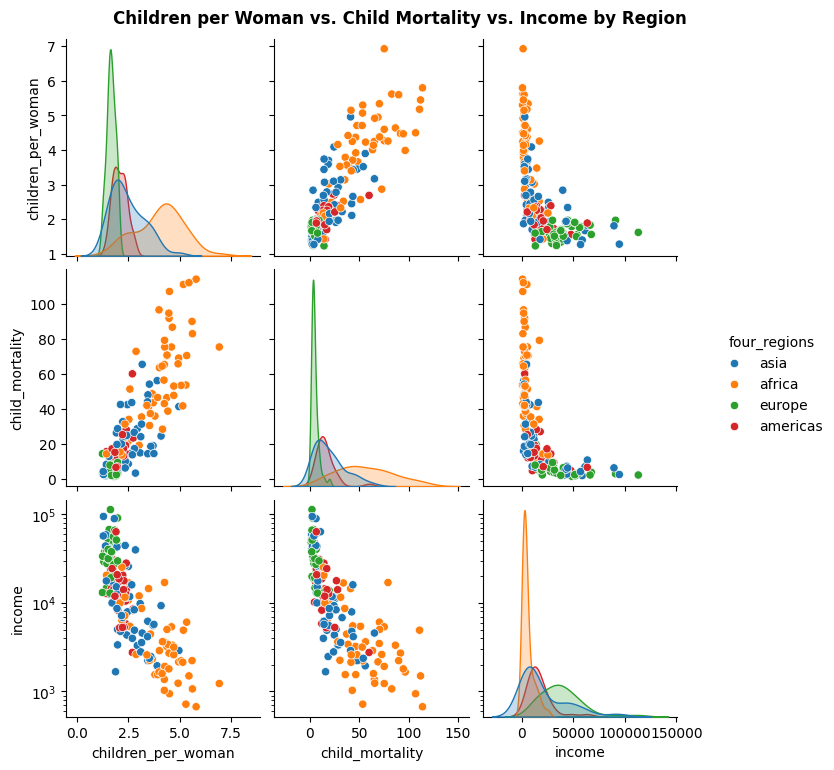

In [34]:
results_reduced = result.loc[:, ['children_per_woman', 'child_mortality', 'income', 'four_regions']]
pair_plot = sns.pairplot(results_reduced, hue='four_regions')
for ax in pair_plot.axes.flatten():
    if ax.get_ylabel() == 'income':
        ax.set_yscale('log')
plt.suptitle('Children per Woman vs. Child Mortality vs. Income by Region', y=1.02, fontsize=12, fontweight='bold');